# 📘 Lesson 5 — Multilayer Perceptron (MLP): Building Deep Networks

---

### 🎯 Why this lesson matters
- The single perceptron can only solve **linearly separable problems** (AND, OR).  
- It **fails on XOR** → this caused the “AI Winter” in the 1970s.  
- Solution: **add hidden layers** → Multilayer Perceptron (MLP).  

👉 MLP is the ancestor of all modern deep learning models.


In [1]:
# Setup
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
torch.manual_seed(42)


## 1) What is an MLP?

An **MLP** is:
- Input layer → Hidden layer(s) → Output layer
- Each layer: linear transformation + non-linear activation

$
y = f(W_2 \cdot f(W_1 x + b_1) + b_2)
$

👉 WHY hidden layers?
- One layer = only linear decision boundary.  
- Multiple layers + nonlinear activation = can approximate any function (Universal Approximation Theorem).


In [2]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 4)   # 2 inputs → 4 hidden units
        self.out = nn.Linear(4, 1)      # 4 hidden → 1 output
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.activation(self.out(x))
        return x


### Understanding `nn.Linear(2, 4)`

In PyTorch, `nn.Linear(in_features, out_features)` defines a **fully connected (dense) layer** in a neural network.

---

#### 1. What it does
- It performs a **linear transformation**:
  
  $
  y = xW^T + b
  $

  where:
  - \( x \) is the input vector
  - \( W \) is the weight matrix
  - \( b \) is the bias vector

---

#### 2. Why `(2, 4)`
- `2` → the **dimension of the input features** (number of values that come into the layer).
- `4` → the **dimension of the output features** (number of values that come out of the layer).

This means:
- Each input sample must be a vector of size 2.
- The layer transforms it into a vector of size 4.

---

#### 3. What parameters are created
- **Weight matrix** \( W \) of shape \([4, 2]\)  
  (each of the 4 outputs has its own set of weights for the 2 inputs).
- **Bias vector** \( b \) of shape \([4]\).

Total learnable parameters:
$
(2 \times 4) + 4 = 12
$

---

#### 4. Why we need it
- A linear layer **projects input data into a new space**.  
- By increasing dimensions (from 2 → 4), the network gains more representational power.  
- This is the first step before applying **non-linear activation functions** (like ReLU), which allows the network to approximate complex functions.

---

✅ **Key takeaway**:  
`nn.Linear(2, 4)` takes a 2-dimensional input vector and transforms it into a 4-dimensional output vector using a trainable weight matrix and bias. This enables the model to learn richer representations of the input data.


## 2) Dataset: XOR Problem

We use XOR, which **cannot** be solved by a single perceptron.  
This shows the real power of MLPs.


In [3]:
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])


## 3) Training MLP on XOR


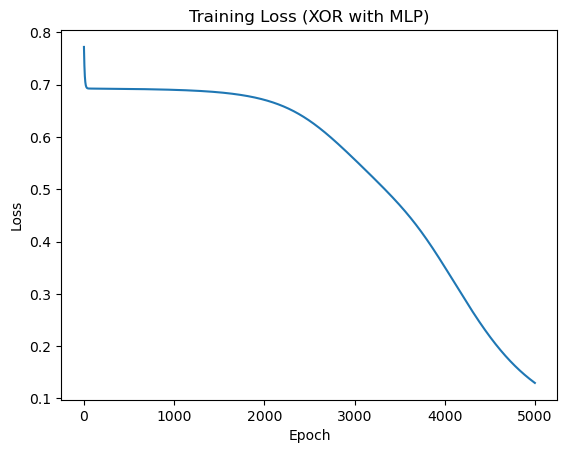

In [4]:
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

losses = []
for epoch in range(5000):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

plt.plot(losses)
plt.title("Training Loss (XOR with MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


## 4) Predictions — did it learn XOR?


In [5]:
with torch.no_grad():
    preds = model(X).round().view(-1).tolist()
print("Predictions:", preds)
print("Targets:    ", y.view(-1).tolist())


Predictions: [0.0, 1.0, 1.0, 0.0]
Targets:     [0.0, 1.0, 1.0, 0.0]


## 5) Visualizing Decision Boundary


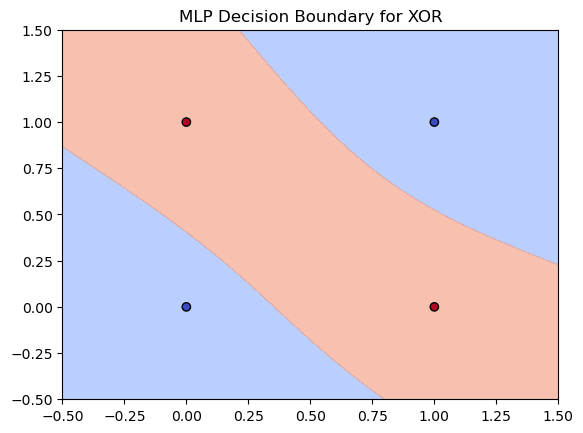

In [6]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0,0.5,1], cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1), cmap="coolwarm", edgecolor="k")
    plt.title("MLP Decision Boundary for XOR")
    plt.show()

plot_decision_boundary(model, X, y)


## 6) Why MLP works for XOR (the key insight)

- A perceptron fails because XOR is **not linearly separable**.  
- With a hidden layer:
  - First layer creates intermediate features (like AND, OR).  
  - Second layer combines them to represent XOR.  

👉 This shows the **power of representation learning**.


## 7) Extending MLP

- Add more hidden layers → deeper networks.  
- Change activation (ReLU, Tanh).  
- Use optimizers beyond SGD (Adam).  

👉 WHY?
This is the foundation of **deep learning**.  
Every CNN, RNN, Transformer is an advanced MLP variant.
